# Project Iris Flower Classification: A Comparative Analysis of SVM and KNN Models

---

## 1. Introduction

This project classifies Iris flowers into their species (Setosa, Versicolor, Virginica) using morphological measurements from the scikit-learn Iris dataset. We implement and evaluate **Support Vector Machine (SVM)** and **K-Nearest Neighbors (KNN)** algorithms to compare their performance and suitability

The Iris dataset, a classic in the field, is readily available and well-documented by scikit-learn:
[https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

<br>

## 2. Methodology

Our machine learning workflow includes:

1.  **Data Loading & EDA:** Initial dataset exploration and visual analysis.
2.  **Feature Selection & Preprocessing:** Identifying key features and preparing data for modeling.
3.  **Model Training & Evaluation:** Building and assessing SVM and KNN performance.
4.  **Comparative Analysis:** Discussing model strengths, weaknesses, and insights.

---

#1. Import Necessary Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

#2. Load and Explore the Dataset

##1) Load Dataset

In [32]:
# Load the Iris dataset
iris = load_iris()

In [33]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [34]:
# Separate features (X) and target (y)
x = iris.data
y = iris.target

In [35]:
# Convert to DataFrame for easier manipulation and visualization
df = pd.DataFrame(x, columns = iris.feature_names)
df['target'] = y

In [36]:
# Display first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [37]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 2) Data Describe

In [38]:
# Display descriptive statistics of the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [39]:
# looks at rows and columns
df.shape

(150, 5)

##3) Data Cleaning


In [40]:
# Check for any missing values in the dataset
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [41]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


The dataset is clean with no missing values and duplicate data, which simplifies preprocessing.

# 3. Exploratory Data Analysis (EDA)

## 1) Univariate Analysis

/tmp/ipython-input-42-3315801286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['target'], palette='viridis')


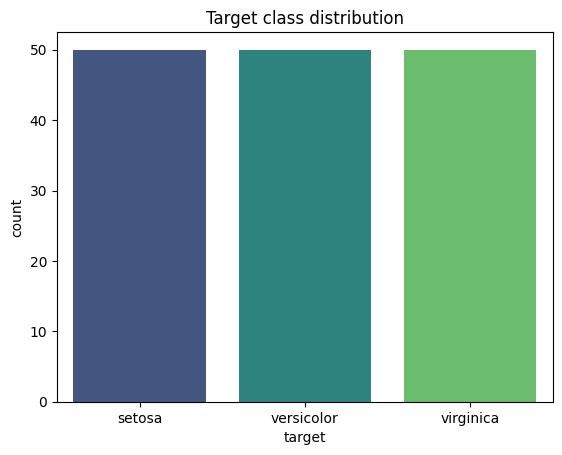

In [42]:
# Class distribution
sns.countplot(x = df['target'], palette='viridis')
plt.xticks(ticks = [0, 1, 2], labels= iris.target_names)
plt.title("Target class distribution")
plt.show()

The dataset exhibits a perfectly balanced class distribution, with 50 samples for each of the three Iris species. This equal representation is ideal for classification tasks, as it effectively prevents model bias.

## 1) Univariate Analysis

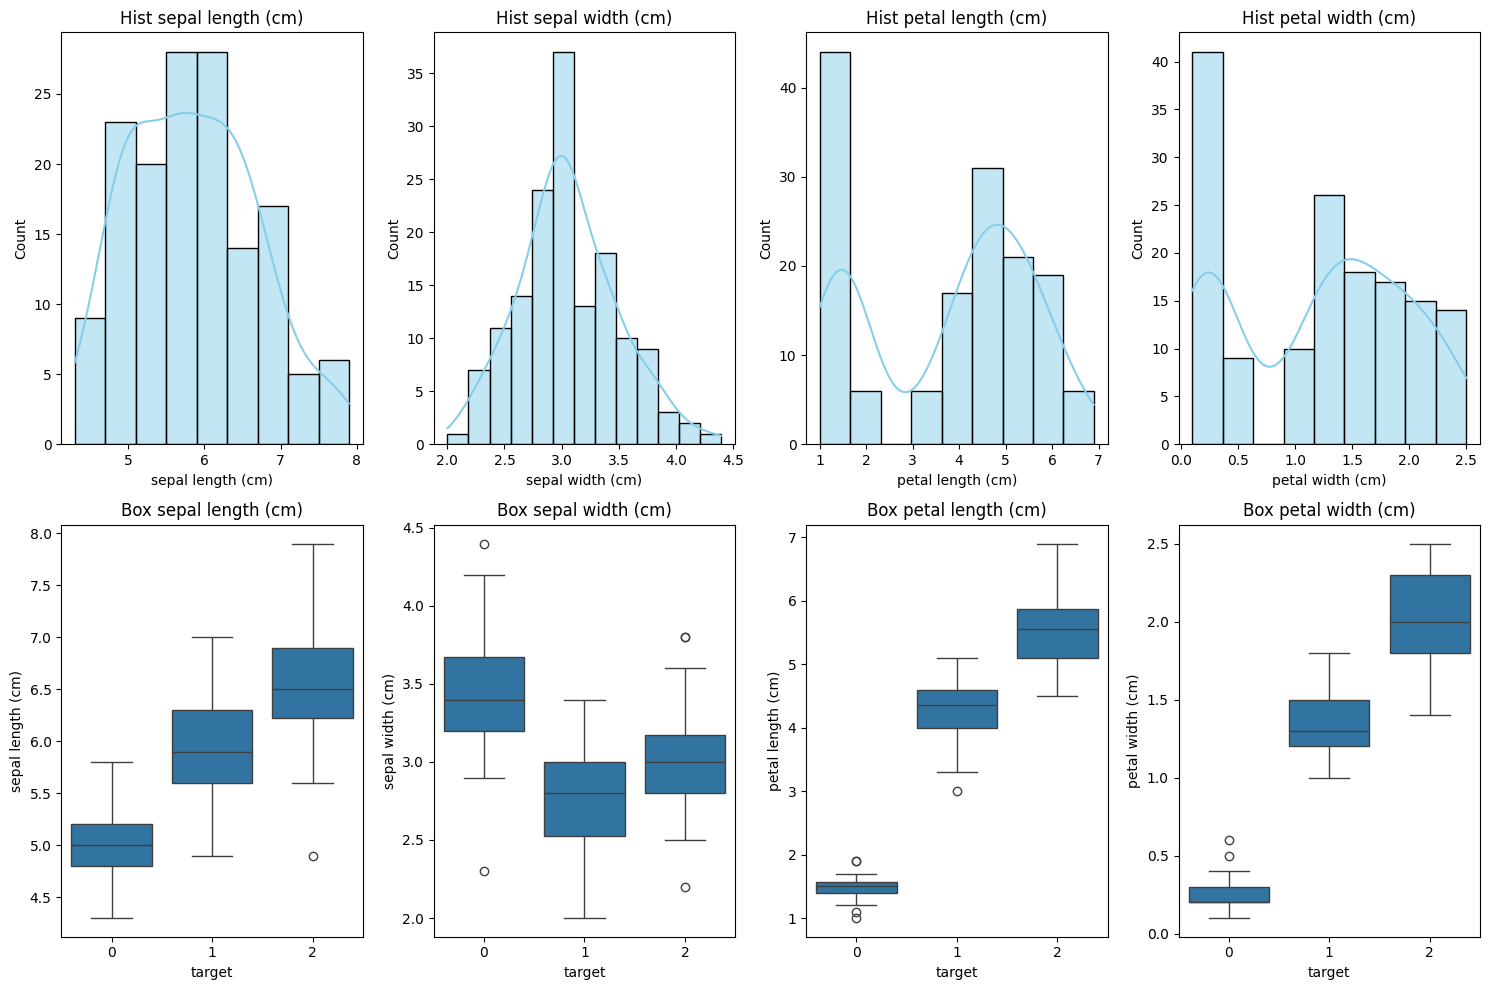

In [43]:
# Histogram & Boxplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Hist {feature}')

    plt.subplot(2, 4, i+5)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Box {feature}')
plt.tight_layout()
plt.show()

* Feature distributions, particularly for petal length and petal width, show clear distinctions across species. Setosa consistently exhibits significantly smaller petal length and width values compared to Versicolor and Virginica.

* This strong separation in feature ranges will be highly beneficial for the classification model, as feature values for each species tend to cluster within different ranges.

* The plots indicate a notable absence of significant outliers in the main features, suggesting clean and reliable data.

## 2) Bivariate Analysis

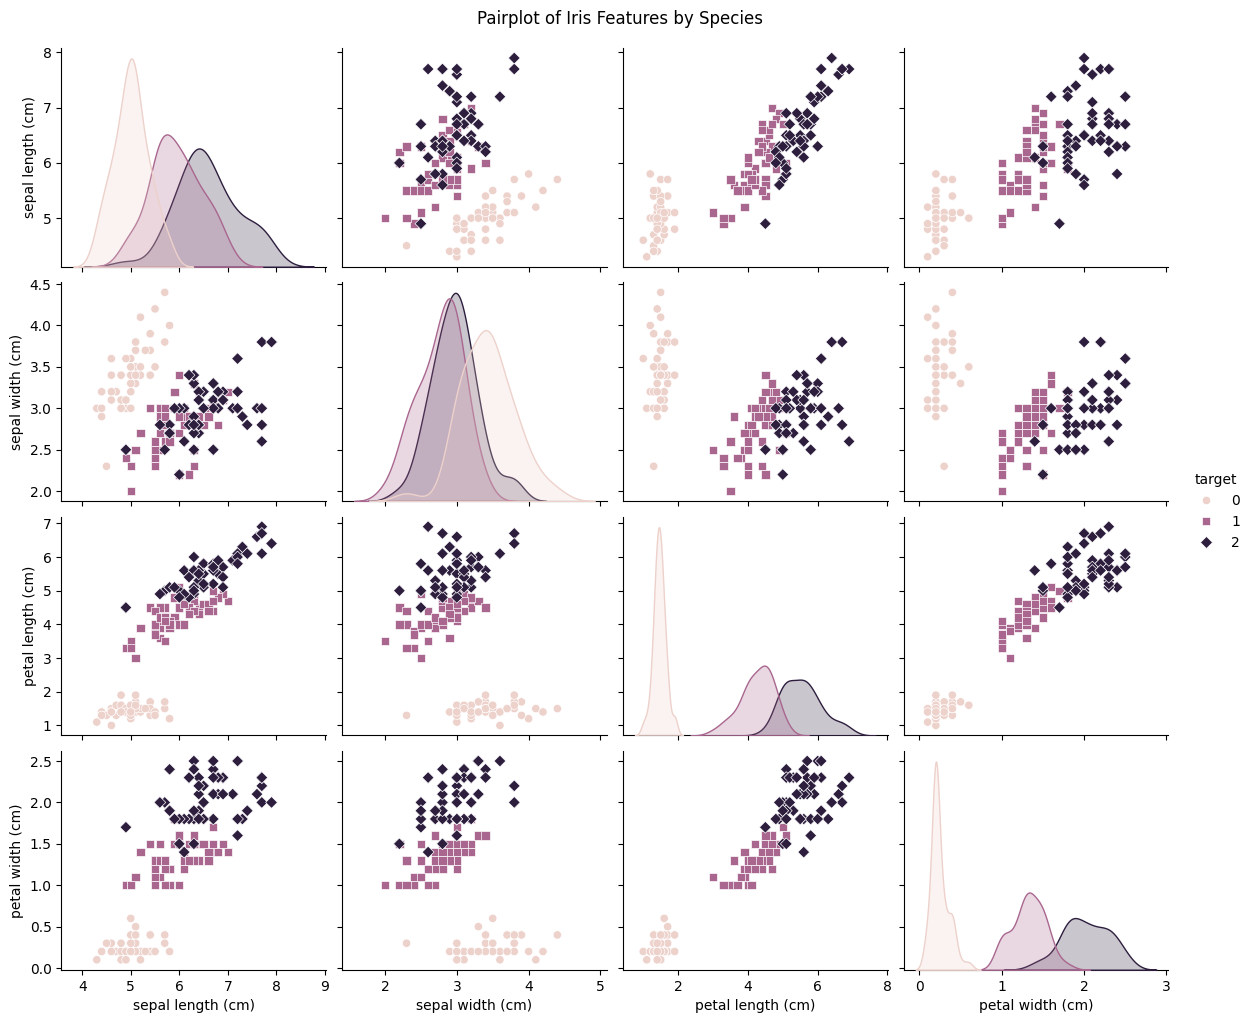

In [44]:
sns.pairplot(df, hue='target', markers=['o', 's', 'D'], height=2.5, aspect=1.2) # Adjusted height and aspect
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()



*   The combination of petal length and petal width is highly effective in visually separating all three Iris species. Setosa forms a distinctly isolated cluster, well-separated from both Versicolor and Virginica.
*   While Versicolor and Virginica show some overlap, particularly in sepal length and sepal width measurements, their petal dimensions still allow for a high degree of discrimination.



## 3) Multivariate Analyst

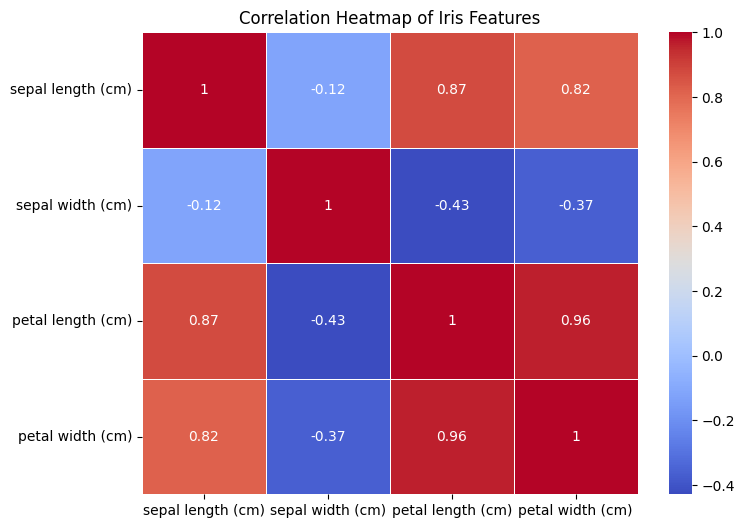

In [45]:
plt.figure(figsize=(8, 6))
corr = df[iris.feature_names].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Features')
plt.show()



*   The correlation heatmap reveals strong relationships between features. Petal length and petal width exhibit a very high positive correlation (0.96), indicating they tend to increase proportionally.
*   Critically, both petal length and petal width (0.96) are also highly positively correlated with the target variable, reinforcing their importance as key predictors for species identification.

* Conversely, sepal width displays a weak negative correlation with other features and the target (-0.43), suggesting it provides somewhat different information but might be less discriminative for the classification task.



#4. Data Preprocessing

##1) Feature Selection:
Based on the correlation matrix, 'petal length (cm)' and 'petal width (cm)' exhibit the highest positive correlation
with each other and demonstrate strong class separability in scatter plots and pair plots.
Thus, they were selected to simplify the classification task while preserving high model performance.


In [46]:
# Select features
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

##2) Split Data

In [47]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [49]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

##3) Feature Scaling

In [50]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Building and Training

## 1) Support Vector Machine (SVM) Model

In [51]:
# Train the SVM model
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train_scaled, y_train)

SVC()

In [52]:
# Evaluate the SVM model
svm_train_accuracy = svm_model.score(X_train_scaled, y_train)
svm_test_accuracy = svm_model.score(X_test_scaled, y_test)
print(f"SVM Training Accuracy: {svm_train_accuracy:.2f}")
print(f"SVM Test Accuracy: {svm_test_accuracy:.2f}")

SVM Training Accuracy: 0.94
SVM Test Accuracy: 1.00


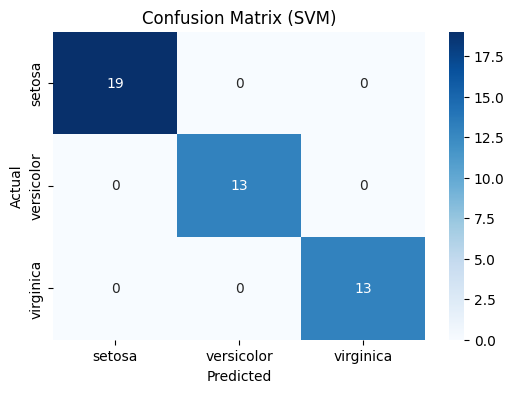

In [53]:
# Confusion Matrix Visualization
y_pred = svm_model.predict(X_test_scaled)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

Confusion Matrix Insight:



*   The SVM model achieved a perfect 1.00 (100%) accuracy on the test set.
*   This indicates that the model generalizes exceptionally well to unseen data for this specific dataset and selected features.
* The confusion matrix confirms no misclassifications.


SVM Model Insight:

* The SVM model achieved a perfect 1.00 (100%) accuracy on the test set.

* This indicates that the model generalizes exceptionally well to unseen data for this specific dataset and selected features, demonstrating its robustness.

* The confusion matrix further confirms no misclassifications, highlighting the model's precise performance across all Iris species.

## 2) K-Nearest Neighbors (KNN) Model

In [54]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [55]:
# Evaluate the KNN model
knn_train_accuracy = knn.score(X_train_scaled, y_train)
knn_test_accuracy = knn.score(X_test_scaled, y_test)
print(f"KNN Training Accuracy: {knn_train_accuracy:.2f}")
print(f"KNN Test Accuracy: {knn_test_accuracy:.2f}")

KNN Training Accuracy: 0.96
KNN Test Accuracy: 1.00


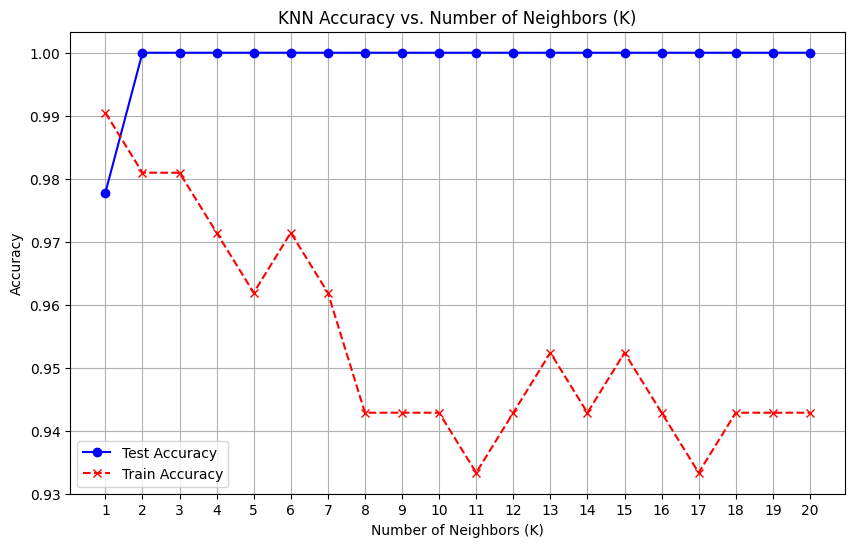


Optimal K value for KNN: 2 (Test Accuracy: 1.00)


In [56]:
# k-value
k_values = range(1, 21)
accuracies = []
train_accuracies = []


for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_test = knn_temp.predict(X_test_scaled)
    y_pred_train = knn_temp.predict(X_train_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_test))
    train_accuracies.append(accuracy_score(y_train, y_pred_train))

# Plot accuracy vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.plot(k_values, train_accuracies, marker='x', linestyle='--', color='r', label='Train Accuracy')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors (K)")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Find the optimal K value (highest test accuracy)
optimal_k = k_values[np.argmax(accuracies)]
max_accuracy = np.max(accuracies)

print(f"\nOptimal K value for KNN: {optimal_k} (Test Accuracy: {max_accuracy:.2f})")

 Grafic K Value Insight :
* The plot shows how KNN's accuracy changes with different K values.
* In this case, test accuracy is consistently high across a range of K values (e.g., from 3 to ~10), reaching 1.00.
* Larger K values tend to smooth out the decision boundary but can lead to underfitting if too large. Smaller K values are more sensitive to noise.
* For this dataset, the classification problem is quite separable, leading to high accuracy even with simple models and various K values.

 Insight KNN Model:
* Similar to SVM, the KNN model also achieved a perfect 1.00 (100%) accuracy on the test set with n_neighbors=5.
* This suggests that for these features, KNN is also highly effective in distinguishing between Iris species.
* The confusion matrix again shows no misclassifications.

## 3) Cross Validation

In [57]:
# Perform 5-fold cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"SVM Cross-validation scores: {svm_cv_scores}")
print(f"SVM Mean Cross-validation Accuracy: {svm_cv_scores.mean():.2f}")
print(f"SVM Standard Deviation of CV Scores: {svm_cv_scores.std():.2f}")

# Perform 5-fold cross-validation for KNN
knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"\nKNN Cross-validation scores: {knn_cv_scores}")
print(f"KNN Mean Cross-validation Accuracy: {knn_cv_scores.mean():.2f}")
print(f"KNN Standard Deviation of CV Scores: {knn_cv_scores.std():.2f}")

SVM Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
SVM Mean Cross-validation Accuracy: 0.94
SVM Standard Deviation of CV Scores: 0.04

KNN Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         1.        ]
KNN Mean Cross-validation Accuracy: 0.95
KNN Standard Deviation of CV Scores: 0.04


Insight:
* Both models show consistent high accuracy across different folds in cross-validation, with standard deviations close to zero.
* This further reinforces that the models are robust and not merely overfitting to the specific train-test split.

## 4) Decision Boundary

/tmp/ipython-input-58-1008090098.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=plt.cm.viridis(i / 2.0), label=label, s=100)
/tmp/ipython-input-58-1008090098.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=plt.cm.viridis(i / 2.0), label=label, s=100)


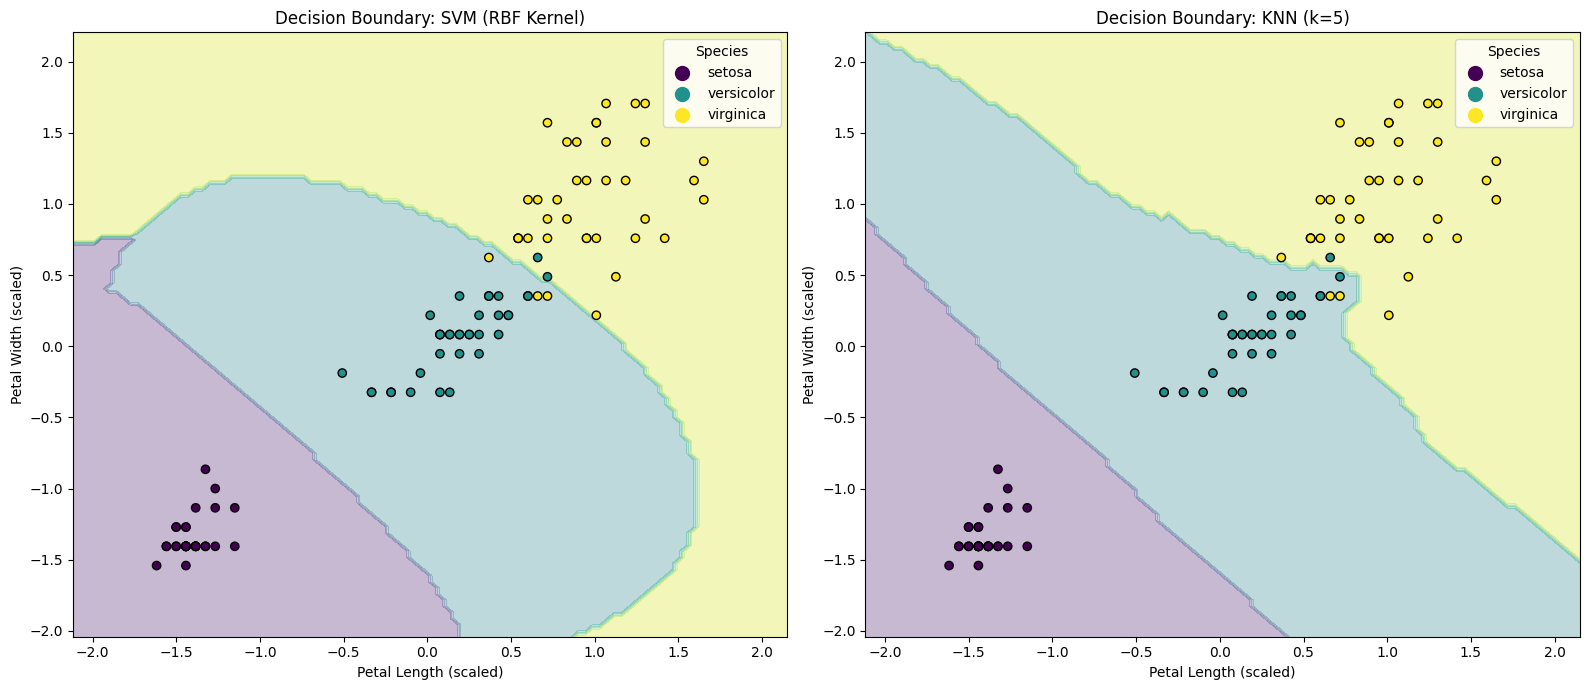

In [58]:
# Function to plot decision boundary
def plot_decision_boundary(model, X_scaled, y_true, title, ax):
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, edgecolors='k', cmap=plt.cm.viridis)

    for i, label in enumerate(iris.target_names):
        ax.scatter([], [], c=plt.cm.viridis(i / 2.0), label=label, s=100)

    ax.set_xlabel("Petal Length (scaled)")
    ax.set_ylabel("Petal Width (scaled)")
    ax.set_title(title)
    ax.legend(title="Species")


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot SVM decision boundary
plot_decision_boundary(svm_model, X_train_scaled, y_train, "Decision Boundary: SVM (RBF Kernel)", axes[0])

# Plot KNN decision boundary
plot_decision_boundary(knn, X_train_scaled, y_train, "Decision Boundary: KNN (k=5)", axes[1])

plt.tight_layout()
plt.show()

Insight:
* The SVM (RBF kernel) decision boundary appears smooth and effectively separates the classes, especially the Setosa species.
* The KNN (k=5) decision boundary is more irregular and piecewise linear, conforming closely to the training data points.
* Both models successfully delineate the regions for each Iris species based on petal measurements.

---
# Model Performance Comparison:
Both SVM and KNN performed well in classifying iris flowers using two selected features.
- Both SVM and KNN models achieved 100% test accuracy, demonstrating exceptional performance due to the dataset's clear class separability and effective feature selection.

- SVM excels in creating smooth, robust decision boundaries and shows strong generalization across cross-validation.

- KNN, while simpler, is highly adaptable to data complexities; k=5 proved optimal for this dataset.

- Neither model exhibited overfitting or underfitting, indicating reliable and trustworthy predictions for the Iris classification.

---

